# Project : Are Credit Models Transferable in Fintech?

## Table of Contents

- Clean Data 
- Build Models 
    - train on LC and test on LC
    - train on LC and test on Prosper
    - train on Prosper and test on Prosper
    - train on Prosper and test on LC
- Read coefficients

## Clean Data

In [335]:
# import LendingClub data
import pandas as pd
df_lc = pd.read_csv("LC_2012Q1_to_2014Q1.csv", index_col = 0)
df_lc.head()

,issue_d,loan_status,pct_tl_nvr_dlq,initial_list_status,purpose,emp_length,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,verification_status,revol_bal,home_ownership,total_acc,open_acc,dti,delinq_amnt,addr_state
0,Dec-13,Fully Paid,100,f,debt_consolidation,4 years,60000,12000,720,724,15,False,7137,False,18,15,4.62,0,NC
1,Dec-13,Fully Paid,100,w,home_improvement,2 years,39600,4800,755,759,3,True,4136,False,8,3,2.49,0,TX
2,Dec-13,Fully Paid,100,w,debt_consolidation,10+ years,55000,27050,730,734,10,True,36638,True,27,14,22.87,0,MI
3,Dec-13,Fully Paid,100,f,debt_consolidation,3 years,96500,12000,705,709,8,False,13248,False,30,17,12.61,0,TX
4,Dec-13,Fully Paid,78,f,debt_consolidation,4 years,88000,14000,670,674,4,False,3686,False,14,6,10.02,0,NC


In [336]:
# import Prosper data
import pandas as pd
df_p = pd.read_csv("Prosper_2012Q1_2014Q1.csv", index_col= 0)
df_p.head()

,issue_d,loan_status,pct_tl_nvr_dlq,purpose,emp_length,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,verification_status,revol_bal,home_ownership,total_acc,open_acc,dti,delinq_amnt,addr_state
3,Q4 2012,Fully Paid,76,car,10+ years,34500.0,10000,800,819,7,True,1444.0,True,5,5,15,10056.0,GA
4,Q3 2013,Fully Paid,95,home_improvement,4 years,115000.0,15000,680,699,6,True,6193.0,True,19,19,26,0.0,MN
5,Q4 2013,Fully Paid,100,debt_consolidation,7 years,100000.0,15000,740,759,13,True,62999.0,True,21,17,36,0.0,NM
6,Q2 2013,Fully Paid,68,debt_consolidation,10+ years,25000.0,3000,680,699,6,True,5812.0,False,10,7,27,0.0,KS
7,Q2 2013,Fully Paid,80,home_improvement,9 years,40269.0,10000,700,719,5,True,1260.0,False,6,6,24,0.0,CA


In [337]:
# reset index
df_lc.reset_index(inplace = True,drop= True)
df_p.reset_index(inplace = True, drop = True)

In [338]:
# check columns
df_p.columns

Index(['issue_d', 'loan_status', 'pct_tl_nvr_dlq', 'purpose', 'emp_length',
       'annual_inc', 'loan_amnt', 'fico_range_low', 'fico_range_high',
       'num_op_rev_tl', 'verification_status', 'revol_bal', 'home_ownership',
       'total_acc', 'open_acc', 'dti', 'delinq_amnt', 'addr_state'],
      dtype='object')

In [339]:
# delete these unwanted columns
no_list_lc = ['initial_list_status','issue_d','addr_state']
no_list_p = ['issue_d','addr_state']
df_lc = df_lc.loc[:,~df_lc.columns.isin(no_list_lc)]
df_p = df_p.loc[:,~df_p.columns.isin(no_list_p)]

In [340]:
# create categorical data for independent variable: loan status
def default(x):
  if x['loan_status'] == 'Charged Off':
    return 'Default'
  if x['loan_status'] == 'Default':
    return 'Default'
  else:
    return 'Fully Paid'
df_lc.loan_status = df_lc.apply(default, axis = 1)
df_p.loan_status = df_p.apply(default, axis = 1)

In [341]:
# get the number of dummy variables in LC
dummies = []
for col in df_lc.columns:
  if df_lc[col].dtype != 'int64' :
    if df_lc[col].dtype != 'float64':
      print(col, ':', df_lc[col].dtype, len(df_lc[col].unique()))
      dummies.append(col)
dummies

loan_status : object 2
purpose : object 13
emp_length : object 11
verification_status : bool 2
home_ownership : bool 2


['loan_status',
 'purpose',
 'emp_length',
 'verification_status',
 'home_ownership']

In [342]:
# get dummy variables and the number of each dummy variable in prosper
for col in df_p.columns:
  if df_p[col].dtype != 'int64' :
    if df_p[col].dtype != 'float64':
      print(col, ':', df_p[col].dtype, len(df_p[col].unique()))
      

loan_status : object 2
purpose : object 11
emp_length : object 10
verification_status : bool 2
home_ownership : bool 2


In [343]:
# only numerical variables in these dataframes
num_lc = df_lc.loc[:,~df_lc.columns.isin(dummies)]
num_p = df_p.loc[:,~df_p.columns.isin(dummies)]
num_lc

,pct_tl_nvr_dlq,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,revol_bal,total_acc,open_acc,dti,delinq_amnt
0,100,60000,12000,720,724,15,7137,18,15,4.62,0
1,100,39600,4800,755,759,3,4136,8,3,2.49,0
2,100,55000,27050,730,734,10,36638,27,14,22.87,0
3,100,96500,12000,705,709,8,13248,30,17,12.61,0
4,78,88000,14000,670,674,4,3686,14,6,10.02,0
...,...,...,...,...,...,...,...,...,...,...,...
193681,79,42000,10000,685,689,8,3196,24,9,11.57,0
193682,100,110000,18400,700,704,9,23208,36,18,19.85,0
193683,100,78000,22000,710,714,13,18238,30,18,18.45,0
193684,97,46000,20700,715,719,2,6688,43,18,25.65,0


In [344]:
# get independent variable column for LC 
import numpy as np
a = np.where(df_lc['loan_status']=='Default',1,0)
ind_var = pd.DataFrame(a)
ind_var.columns = ['loan_status']


In [345]:
# get independent variable column for Prosper
import numpy as np
a = np.where(df_p['loan_status']=='Default',1,0)
ind_var_p = pd.DataFrame(a)
ind_var_p.columns = ['loan_status']


In [346]:
# normalize columns
dum_df = df_lc.loc[:,[d for d in dummies if 'loan_status' not in d]]

new_dum_df = pd.get_dummies(dum_df, drop_first= True)

In [347]:
new_dum_df.verification_status.value_counts()


True     134071
False     59615
Name: verification_status, dtype: int64

In [348]:
# create new LC dataset

new_dum_df['verification_status'] = np.where(new_dum_df['verification_status']==True,1,0)

new_dum_df['home_ownership'] = np.where(new_dum_df['home_ownership']==True,1,0)
new_dum_df

,verification_status,home_ownership,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193681,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
193682,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
193683,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
193684,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [349]:
test = pd.concat([num_lc, new_dum_df], axis = 1)

In [352]:
# check correlations between variables
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = num_lc.corr()
corrMatrix

,pct_tl_nvr_dlq,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,revol_bal,total_acc,open_acc,dti,delinq_amnt
pct_tl_nvr_dlq,1.000000,-0.024090,0.087156,0.296259,0.296256,0.110558,0.131425,-0.021629,0.091508,0.093783,-0.012146
annual_inc,-0.024090,1.000000,0.347368,0.105313,0.105314,0.069239,0.326287,0.218474,0.144628,-0.192982,0.005714
loan_amnt,0.087156,0.347368,1.000000,0.120087,0.120085,0.165098,0.332175,0.230140,0.188704,0.047274,-0.001545
fico_range_low,0.296259,0.105313,0.120087,1.000000,1.000000,-0.001580,0.060607,0.039550,0.026707,-0.068782,-0.010259
fico_range_high,0.296256,0.105314,0.120085,1.000000,1.000000,-0.001579,0.060607,0.039550,0.026707,-0.068785,-0.010259
num_op_rev_tl,0.110558,0.069239,0.165098,-0.001580,-0.001579,1.000000,0.228964,0.497456,0.814282,0.165512,0.000054
revol_bal,0.131425,0.326287,0.332175,0.060607,0.060607,0.228964,1.000000,0.195808,0.213708,0.141344,-0.000536
total_acc,-0.021629,0.218474,0.230140,0.039550,0.039550,0.497456,0.195808,1.000000,0.667763,0.222452,0.010037
open_acc,0.091508,0.144628,0.188704,0.026707,0.026707,0.814282,0.213708,0.667763,1.000000,0.293500,0.003259
dti,0.093783,-0.192982,0.047274,-0.068782,-0.068785,0.165512,0.141344,0.222452,0.293500,1.000000,-0.004101


In [353]:
# drop columns that seem to have high correlation with other variables
num_lc = num_lc.drop(columns = {'fico_range_low','total_acc','open_acc','pct_tl_nvr_dlq'}, axis = 1)
num_lc.head()

,annual_inc,loan_amnt,fico_range_high,num_op_rev_tl,revol_bal,dti,delinq_amnt
0,60000,12000,724,15,7137,4.62,0
1,39600,4800,759,3,4136,2.49,0
2,55000,27050,734,10,36638,22.87,0
3,96500,12000,709,8,13248,12.61,0
4,88000,14000,674,4,3686,10.02,0


In [354]:
df_lc.head()

,loan_status,pct_tl_nvr_dlq,purpose,emp_length,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,verification_status,revol_bal,home_ownership,total_acc,open_acc,dti,delinq_amnt
0,Fully Paid,100,debt_consolidation,4 years,60000,12000,720,724,15,False,7137,False,18,15,4.62,0
1,Fully Paid,100,home_improvement,2 years,39600,4800,755,759,3,True,4136,False,8,3,2.49,0
2,Fully Paid,100,debt_consolidation,10+ years,55000,27050,730,734,10,True,36638,True,27,14,22.87,0
3,Fully Paid,100,debt_consolidation,3 years,96500,12000,705,709,8,False,13248,False,30,17,12.61,0
4,Fully Paid,78,debt_consolidation,4 years,88000,14000,670,674,4,False,3686,False,14,6,10.02,0


In [355]:
# use VIF to test correlations
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif["features"] = test.columns
vif.round(1)

,VIF Factor,features
0,180.6,pct_tl_nvr_dlq
1,4.0,annual_inc
2,6.3,loan_amnt
3,24182624.1,fico_range_low
4,24258813.2,fico_range_high
5,17.3,num_op_rev_tl
6,2.3,revol_bal
7,11.9,total_acc
8,30.1,open_acc
9,8.1,dti


In [356]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num_lc.values, i) for i in range(num_lc.shape[1])]
vif["features"] = num_lc.columns
vif.round(1)

,VIF Factor,features
0,3.7,annual_inc
1,5.3,loan_amnt
2,13.0,fico_range_high
3,5.7,num_op_rev_tl
4,2.2,revol_bal
5,6.8,dti
6,1.0,delinq_amnt


In [358]:
# drop variables that have high correlations
new_dum_df = test.drop(columns = {'purpose_debt_consolidation','pct_tl_nvr_dlq','fico_range_high','open_acc','num_op_rev_tl','total_acc','emp_length_10+ years'}, axis =1)
new_dum_df.head()

,annual_inc,loan_amnt,fico_range_low,revol_bal,dti,delinq_amnt,verification_status,home_ownership,purpose_credit_card,purpose_home_improvement,...,purpose_wedding,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,60000,12000,720,7137,4.62,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,39600,4800,755,4136,2.49,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,55000,27050,730,36638,22.87,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96500,12000,705,13248,12.61,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,88000,14000,670,3686,10.02,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [359]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_dum_df .values, i) for i in range(new_dum_df .shape[1])]
vif["features"] = new_dum_df .columns
vif.round(1)

,VIF Factor,features
0,3.7,annual_inc
1,6.2,loan_amnt
2,14.5,fico_range_low
3,2.2,revol_bal
4,6.9,dti
5,1.0,delinq_amnt
6,4.0,verification_status
7,1.1,home_ownership
8,1.4,purpose_credit_card
9,1.1,purpose_home_improvement


In [360]:
# merge dependent variables with independent variables
new_df_lc = pd.concat([new_dum_df, ind_var], axis = 1)

new_df_lc.head()

,annual_inc,loan_amnt,fico_range_low,revol_bal,dti,delinq_amnt,verification_status,home_ownership,purpose_credit_card,purpose_home_improvement,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,loan_status
0,60000,12000,720,7137,4.62,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,39600,4800,755,4136,2.49,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,55000,27050,730,36638,22.87,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96500,12000,705,13248,12.61,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,88000,14000,670,3686,10.02,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [361]:
# create new prosper dataset
dum_df_p = df_p.loc[:,[d for d in dummies if 'loan_status' not in d]]
new_dum_df_p = pd.get_dummies(dum_df_p, drop_first= True)
new_dum_df_p['verification_status'] = np.where(new_dum_df_p['verification_status']==True,1,0)

new_dum_df_p['home_ownership'] = np.where(new_dum_df_p['home_ownership']==True,1,0)

new_df_p = pd.concat([num_p, new_dum_df_p, ind_var_p], axis = 1)
new_df_p.head()

,pct_tl_nvr_dlq,annual_inc,loan_amnt,fico_range_low,fico_range_high,num_op_rev_tl,revol_bal,total_acc,open_acc,dti,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,loan_status
0,76,34500.0,10000,800,819,7,1444.0,5,5,15,...,1,0,0,0,0,0,0,0,0,0
1,95,115000.0,15000,680,699,6,6193.0,19,19,26,...,0,0,0,1,0,0,0,0,0,0
2,100,100000.0,15000,740,759,13,62999.0,21,17,36,...,0,0,0,0,0,0,1,0,0,0
3,68,25000.0,3000,680,699,6,5812.0,10,7,27,...,1,0,0,0,0,0,0,0,0,0
4,80,40269.0,10000,700,719,5,1260.0,6,6,24,...,0,0,0,0,0,0,0,0,1,0


In [362]:
# create empty dummy columns in prosper since the number is less than that in LC
add_cols = []
for col in new_df_lc.columns:
  if col not in new_df_p.columns:
    print (col)
    add_cols.append(col)
add_cols

purpose_credit_card
purpose_moving
emp_length_< 1 year


['purpose_credit_card', 'purpose_moving', 'emp_length_< 1 year']

In [363]:
# set all empty variables to 0 and set the sequence of variable the same as in LC
for i in add_cols:
  new_df_p[i] = 0

col_seq = new_df_lc.columns
new_df_p = new_df_p[col_seq]

In [364]:
df_lc.shape, df_p.shape, new_df_p.shape, new_df_lc.shape

((193686, 16), (49648, 16), (49648, 29), (193686, 29))

In [365]:
new_df_lc.columns

Index(['annual_inc', 'loan_amnt', 'fico_range_low', 'revol_bal', 'dti',
       'delinq_amnt', 'verification_status', 'home_ownership',
       'purpose_credit_card', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'loan_status'],
      dtype='object')

## Build Models


In [366]:
# Split data into training and test set for LC
from sklearn.model_selection import train_test_split
X_all = new_df_lc.loc[:,[i for i in new_df_lc.columns if 'loan_status' not in i]]
x_all = X_all.values
Y_all = new_df_lc.loc[:,'loan_status']
y_all = Y_all.values
X_train, X_test, Y_train, Y_test = train_test_split(x_all, y_all, test_size = 0.2, random_state = 0)

In [367]:
# conduct logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
classifier.coef_

array([[-5.41934435e-06,  3.77859163e-05, -3.17152340e-03,
        -8.84092623e-06,  2.53564764e-02,  1.67877456e-06,
         1.17764704e-03,  4.61421991e-08, -9.92790465e-04,
         3.06714403e-05,  1.41077399e-05, -7.73646293e-06,
         5.60787210e-05,  4.48085806e-05,  3.44944304e-04,
        -1.59625212e-06,  1.48477077e-04,  1.90322037e-05,
         7.63304072e-06,  6.94609048e-05,  1.21689876e-05,
        -1.51436101e-05,  2.14316918e-05,  1.01135260e-04,
        -1.02637133e-05,  4.50206951e-05,  5.91768369e-05,
         9.17297354e-05]])

In [368]:
classifier.fit(X_train, Y_train)
positive_coef = (classifier.coef_>0).flatten()

cols = X_all.columns[positive_coef]
cols

Index(['loan_amnt', 'dti', 'delinq_amnt', 'verification_status',
       'home_ownership', 'purpose_home_improvement', 'purpose_house',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year'],
      dtype='object')

https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f

In [369]:
# feature selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
selector = SelectFromModel(estimator = LogisticRegression(), threshold =-np.inf, max_features = 10)
selector.fit(X_train, Y_train)
feature_idx = selector.get_support()
feature_idx


array([False, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
        True])

In [370]:
# final features
features = X_all.columns
feature_names = features[feature_idx]
feature_names


Index(['fico_range_low', 'dti', 'verification_status', 'purpose_credit_card',
       'purpose_other', 'purpose_small_business', 'emp_length_2 years',
       'emp_length_6 years', 'emp_length_9 years', 'emp_length_< 1 year'],
      dtype='object')

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [371]:
LC_x = new_df_lc[feature_names]
P_x = new_df_p[feature_names]
ind_LC = new_df_lc.loc[:,'loan_status']
ind_prosper = new_df_p.loc[:,'loan_status']
LC  = pd.concat([LC_x, ind_LC], axis = 1)
P = pd.concat([P_x, ind_prosper], axis = 1)

In [372]:
# Split data into training and test set for LC
from sklearn.model_selection import train_test_split
X = LC.loc[:,[i for i in LC.columns if 'loan_status' not in i]]
x = X.values
Y = LC.loc[:,'loan_status']
y = Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [373]:
# feature scaling for LC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_lc = sc.fit_transform(x)
x_lc

array([[ 0.88113402, -1.67387492, -1.4996491 , ..., -0.25897866,
        -0.2046664 , -0.28163675],
       [ 2.09263409, -1.95472995,  0.66682266, ..., -0.25897866,
        -0.2046664 , -0.28163675],
       [ 1.22727689,  0.73251207,  0.66682266, ..., -0.25897866,
        -0.2046664 , -0.28163675],
       ...,
       [ 0.53499114,  0.14970492,  0.66682266, ..., -0.25897866,
        -0.2046664 , -0.28163675],
       [ 0.70806258,  1.09907404,  0.66682266, ..., -0.25897866,
        -0.2046664 , -0.28163675],
       [ 0.70806258, -1.57234517,  0.66682266, ..., -0.25897866,
        -0.2046664 , -0.28163675]])

In [374]:
# Set x and independent variables in Prosper
x_prosper = P.loc[:,[col for col in P.columns if 'loan_status' not in col]].values
ind_prosper = P.loc[:,'loan_status'].values

# feature scaling for Prosper
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_prosper = sc.fit_transform(x_prosper)


In [375]:
# defaults only account for 15% of data
# we need to balance dependent var
LC[ind_LC == 1].shape[0]/ LC.shape[0]

0.15519449005090713

In [376]:
from sklearn.model_selection import KFold,GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import classification_report

y_train, y_test = np.asarray(y_train), np.asarray(y_test)

us = NearMiss()
os_us = SMOTETomek()
os =  RandomOverSampler()
x_train_res, y_train_res = us.fit_sample(x_train, y_train)



https://github.com/mldataanalysis/Dealing-With-Imbalanced-Data/blob/master/2%20-%20Under%20Sampling%20Example.ipynb

In [377]:
x_train.shape, x_test.shape, x_train_res.shape, y_train_res.shape, x_test.shape, y_test.shape

((154948, 10), (38738, 10), (48306, 10), (48306,), (38738, 10), (38738,))

In [378]:
# LC: create new x, y after up sample 
x_total = np.concatenate([x_train_res, x_test], axis = 0)
y_total = np.concatenate([y_train_res, y_test], axis = 0)

### Train on LC and test on LC


In [379]:
# stratefied cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

accu_stratified = [] 

for train_index, test_index in skf.split(x_total, y_total): 
    x_train_fold, x_test_fold = x_total[train_index], x_total[test_index] 
    y_train_fold, y_test_fold = y_total[train_index], y_total[test_index] 
    classifier.fit(x_train_fold, y_train_fold) 
    y_pred = classifier.predict(x_test_fold)
    grid = np.concatenate( (y_test_fold.reshape(len(y_test_fold),1), y_pred.reshape(len(y_pred),1    ))   ,1)
    accu_stratified.append(classifier.score(x_test_fold, y_test_fold)) 

https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

In [380]:
# all accuracies for 10 folds
sum = 0
for i in accu_stratified:
  sum+= i
avg_acc = round(sum/len(accu_stratified),4)*100
accu_stratified

[0.6657093624353819,
 0.662952326249282,
 0.6669730040206777,
 0.663641585295807,
 0.6588924632352942,
 0.6626838235294118,
 0.6616498161764706,
 0.6625689338235294,
 0.6662454044117647,
 0.6655560661764706]

In [381]:
print('Overall Accuracy:',avg_acc, '%') 

Overall Accuracy: 66.36999999999999 %


In [382]:
# metrics for LC
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score is:', round(accuracy_score(y_test_fold, y_pred)*100,2),'%')
print('Confusion matrix:') 
confusion_matrix = confusion_matrix(y_test_fold, y_pred)
confusion_matrix

Accuracy score is: 66.56 %
Confusion matrix:


array([[5344,  354],
       [2557,  449]])

In [383]:
confusion_matrix[1][0]

2557

In [384]:
# precision, recall for LC
precision = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])*100
recall = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1])*100
precision, recall

(67.63700797367423, 93.78729378729379)

In [385]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



Procedure 1:
precision: 67.63700797367423 recall: 93.78729378729379
Accuracy score is: 66.56 %
AUC: 0.56


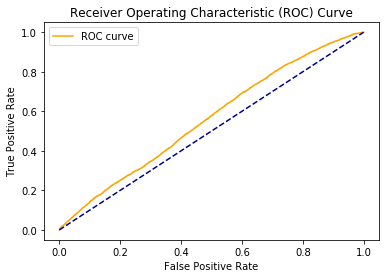

ROC of Procedure 1 = 0.56


In [386]:
probs = classifier.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('Procedure 1:')
print('precision:',precision,'recall:',recall)
print('Accuracy score is:', round(accuracy_score(y_test_fold, y_pred)*100,2),'%')
print('AUC: %.2f' % auc)

import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
print('ROC of Procedure 1 = %0.2f' %roc_auc)

#### Feature Selection notes

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

### Train on LC and test on Prosper


In [387]:
# Apply the model to Prosper
prosper_pred = classifier.predict(x_prosper)
np.concatenate(  (ind_prosper.reshape(len(ind_prosper),1), prosper_pred.reshape(len(prosper_pred),1    ))   ,1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [388]:
# metrics for Prosper
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score is:', round(accuracy_score(ind_prosper, prosper_pred)*100,2),'%')
print('Confusion matrix:') 
p_confusion_matrix = confusion_matrix(ind_prosper, prosper_pred)
p_confusion_matrix

Accuracy score is: 87.04 %
Confusion matrix:


array([[42801,  2814],
       [ 3619,   414]])

In [389]:

p_precision = p_confusion_matrix[0][0]/(p_confusion_matrix[0][0]+p_confusion_matrix[1][0])*100
p_recall = p_confusion_matrix[0][0]/(p_confusion_matrix[0][0]+p_confusion_matrix[0][1])*100
p_precision, p_recall

(92.20379146919431, 93.83097665241696)

In [398]:
probs_p = classifier.predict_proba(x_prosper)
probs_p

array([[0.76562541, 0.23437459],
       [0.68852004, 0.31147996],
       [0.71211414, 0.28788586],
       ...,
       [0.69535334, 0.30464666],
       [0.71462768, 0.28537232],
       [0.67149009, 0.32850991]])

Procedure 2:
precision: 92.20379146919431 recall: 93.83097665241696
Accuracy score is: 87.04 %
AUC: 0.58


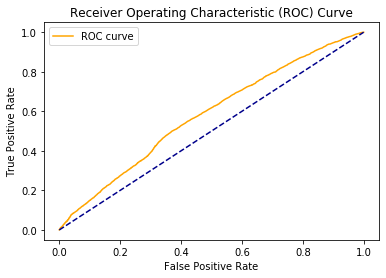

ROC of Procedure 2 = 0.58


In [390]:
probs_p = classifier.predict_proba(x_prosper)
probs_p = probs_p[:, 1]
auc = roc_auc_score(ind_prosper, probs_p)
print('Procedure 2:')
print('precision:',p_precision,'recall:',p_recall)
print('Accuracy score is:', round(accuracy_score(ind_prosper, prosper_pred)*100,2),'%')
print('AUC: %.2f' % auc)

import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(ind_prosper, probs_p)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
print('ROC of Procedure 2 = %0.2f' %roc_auc)

### Train on Prosper and test on Prosper


In [391]:
# create new algorithm for Propser
# split data
from sklearn.model_selection import train_test_split
x_p = P.loc[:,[i for i in P.columns if 'loan_status' not in i]].values
y_p = P.loc[:,'loan_status'].values
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size = 0.3, random_state = 0)



y_train_p, y_test_p = np.asarray(y_train_p), np.asarray(y_test_p)

us = NearMiss()

x_train_res_p, y_train_res_p = us.fit_sample(x_train_p, y_train_p)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_res_p = sc.fit_transform(x_train_res_p)
x_test_p = sc.transform(x_test_p)

# fit logistics regression
from sklearn.linear_model import LogisticRegression
classifier_p = LogisticRegression(random_state = 0)
classifier_p.fit(x_train_res_p, y_train_res_p)
y_pred_p = classifier.predict(x_test_p)
np.concatenate(  (y_test_p.reshape(len(y_test_p),1), y_pred_p.reshape(len(y_pred_p),1    ))   ,1)

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score is:', round(accuracy_score(y_test_p, y_pred_p)*100,2),'%')
print('Confusion matrix:') 
prosper_confusion_matrix = confusion_matrix(y_test_p, y_pred_p)
prosper_confusion_matrix

Accuracy score is: 78.31 %
Confusion matrix:


array([[11357,  2325],
       [  906,   307]])

Procedure 3:
precision: 92.61192204191471 recall: 83.00687034059348
Accuracy score is: 78.31 %
AUC: 0.57


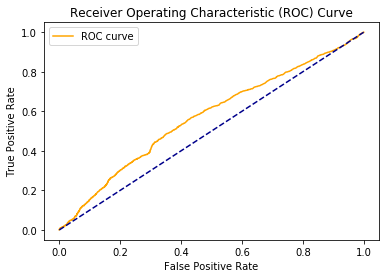

ROC of Procedure 3 = 0.57


In [392]:
prosper_precision = prosper_confusion_matrix[0][0]/(prosper_confusion_matrix[0][0]+prosper_confusion_matrix[1][0])*100
prosper_recall = prosper_confusion_matrix[0][0]/(prosper_confusion_matrix[0][0]+prosper_confusion_matrix[0][1])*100
prosper_precision, prosper_recall


probs_p1 = classifier_p.predict_proba(x_test_p)
probs_p1 = probs_p1[:, 1]
auc = roc_auc_score(y_test_p, probs_p1)

print('Procedure 3:')
print('precision:',prosper_precision,'recall:',prosper_recall)
print('Accuracy score is:', round(accuracy_score(y_test_p, y_pred_p)*100,2),'%')
print('AUC: %.2f' % auc)
import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(y_test_p, probs_p1)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
print('ROC of Procedure 3 = %0.2f' %roc_auc)

### Train on Prosper and test on LC

In [394]:

# apply to LC
LC_pred = classifier_p.predict(x_lc)
np.concatenate(  (y.reshape(len(y),1), LC_pred.reshape(len(LC_pred),1    ))   ,1)

LC_confusion_matrix = confusion_matrix(y, LC_pred)
LC_confusion_matrix 

array([[86112, 77515],
       [13260, 16799]])

Procedure 4:
precision: 86.65620094191523 recall: 52.627011434543206
Accuracy score is: 53.13 %
AUC: 0.56


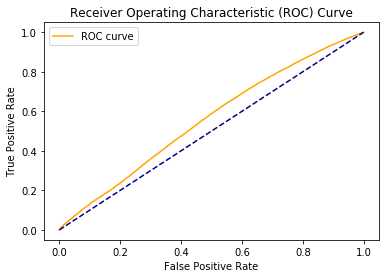

ROC of Procedure 4 = 0.56


In [395]:



LC_precision = LC_confusion_matrix[0][0]/(LC_confusion_matrix[0][0]+LC_confusion_matrix[1][0])*100
LC_recall = LC_confusion_matrix[0][0]/(LC_confusion_matrix[0][0]+LC_confusion_matrix[0][1])*100


probs_lc = classifier_p.predict_proba(x_lc)
probs_lc = probs_lc[:, 1]
auc = roc_auc_score(y, probs_lc)
print('Procedure 4:')
print('precision:',LC_precision,'recall:',LC_recall)
print('Accuracy score is:', round(accuracy_score(y, LC_pred)*100,2),'%')
print('AUC: %.2f' % auc)

import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(y, probs_lc)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
print('ROC of Procedure 4 = %0.2f' %roc_auc)

## Read Coefficients

In [397]:
# coefficients for LC, and prosper respectively
a = classifier.coef_.flatten()
b = classifier_p.coef_.flatten()
df = pd.DataFrame(a, columns =['lc_coef'])  
df['p_coef'] = b

df.set_index(X.columns, inplace = True)
df

,lc_coef,p_coef
fico_range_low,-0.127726,-0.033936
dti,0.180237,0.934427
verification_status,-0.040705,0.000000
purpose_credit_card,0.104133,0.000000
purpose_other,0.170627,0.746596
purpose_small_business,0.135198,0.846884
emp_length_2 years,0.198533,0.554537
emp_length_6 years,0.180863,0.796638
emp_length_9 years,0.153854,1.000514
emp_length_< 1 year,0.204825,0.000000
